In [88]:
import numpy as np
from scipy import stats
import pandas as pd
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import KFold
import math
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import sqlite3
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.svm import SVR
from sklearn.grid_search import GridSearchCV
import random

%matplotlib inline

coefs = pd.read_csv('feature_imp_new.csv', low_memory=False)
coefs

,Unnamed: 0,0
0,pct_black,576637.438489
1,SATMT25,370664.537880
2,poverty_rate,329344.489323
3,SAT_AVG_ALL,261633.533141
4,SATMTMID,159806.834317
5,pct_asian,107237.148451
6,pct_hispanic,67859.392727
7,CDR3,64907.692486
8,ACTMT25,57963.691355
9,ACTEN25,47546.364699


In [89]:
abs_coefs = coefs.iloc[:,1].abs()
abs_coefs
labels = coefs.iloc[:,0]
labels
frames = [labels, abs_coefs]
coefs = pd.concat(frames, axis=1)
final_coefs = coefs.sort('0', axis=0, ascending=False)
final_coefs.to_csv('feature_imp_abs.csv', encoding='utf-8')
final_coefs

/Users/samhita/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Unnamed: 0,0
229,GRAD_DEBT_MDN10YR_SUPP,980270.297339
228,PCTPELL,922749.865755
227,pct_white,592918.418672
0,pct_black,576637.438489
226,pct_born_us,554285.289916
1,SATMT25,370664.537880
225,SAT_AVG,343526.604694
2,poverty_rate,329344.489323
224,SATMT75,261909.679806
3,SAT_AVG_ALL,261633.533141


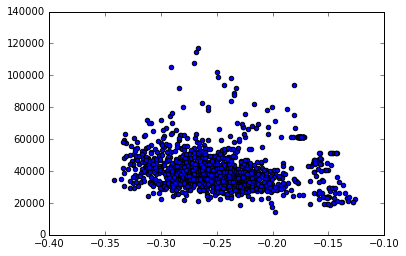

(1534,)
(1534, 1)


ValueError: all the input array dimensions except for the concatenation axis must match exactly

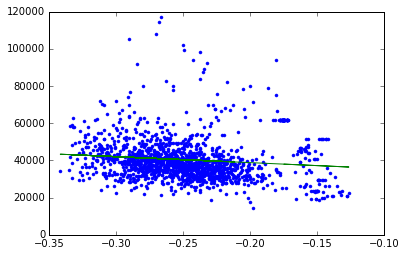

In [133]:
# read in data (x) and labels (y)
data = pd.read_csv("x_named_z.csv", low_memory=False, index_col=0)
labels = pd.read_csv('y_named.csv', header=None) 

x = data
x = x.drop('UNITID', axis=1)

y = pd.read_csv('y_named.csv', low_memory=False, header=None)
schools = y.ix[:,0]
y.index = schools
list_schools = schools.tolist()
y.index = list_schools
y = y.drop(0,axis=1)

plt.scatter(x['pct_black'], y)
plt.show()

x = x['pct_black']

#y.reshape(len(y), 1)
#pd.DataFrame(x, columns=['0','1'])
#x=x.reshape(len(x), 1)
#print (x.shape)
#print (y.shape)

x = np.array(x)
y = np.array(y)
print (x.shape)
print (y.shape)
# fit with np.polyfit
m, b = np.polyfit(x, y, 1)

plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-')
print (np.corrcoef(x, y))

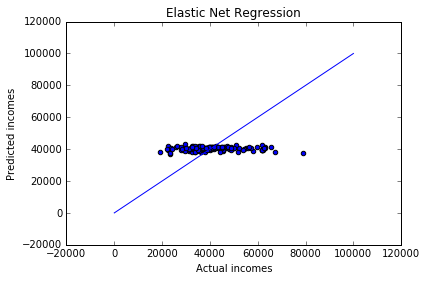

RMSE: 1    10703.249537
dtype: float64
r2: -0.00843379398407


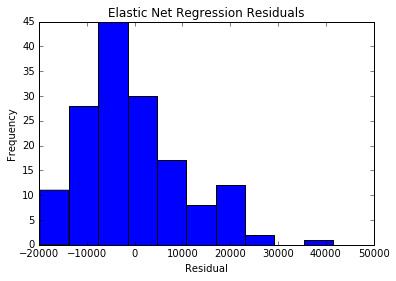

                                                               1
Naropa University                                  -19829.539115
Universidad del Sagrado Corazon                    -18954.931844
Goddard College                                    -17619.933150
Bard College                                       -17401.062366
American National University                       -16991.549956
Maharishi University of Management                 -15934.141326
Burlington College                                 -15773.094269
San Francisco Art Institute                        -15694.816710
Inter American University of Puerto Rico-Barran... -14252.255378
American University of Puerto Rico                 -13942.037761
                                                               1
Salus University                                    41489.158942
Upstate Medical University                          28874.391683
Rush University                                     24118.989267
Cornell University       

/Users/samhita/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:32: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/samhita/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:34: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [79]:


def plotPred(y_predict, y_test, name):
    plt.figure()
    plt.scatter(y_test, y_predict)
    t = np.arange(0, 100000, 1)
    plt.plot(t,t)
    plt.xlabel('Actual incomes')
    plt.ylabel('Predicted incomes')
    plt.title(name)
    plt.show()
    print("RMSE:", rmse(y_test, y_predict))    
    print("r2:", r2_score(y_test, y_predict))

def rmse(y_test, y_predict):    
    a = y_test - y_predict
    a = a ** 2
    a = a.mean()
    a = np.sqrt(a)
    return a 

def plotResiduals(y_predict, y_test, name):
    plt.figure()
    plt.hist(y_test-y_predict)
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.title(name + ' Residuals')
    plt.show()

def listTenLargestResiduals(y_predict, y_test):
    residuals = y_test-y_predict
    residuals_10worst = residuals.sort(1,axis=0)
    print(residuals_10worst.head(n=10))
    residuals_10best = residuals.sort(1,axis=0,ascending=False)
    print(residuals_10best.head(n=10))

# fit and test the regressor, output graph and evaluation statistics
def regress(model, name):
    reg = model
    reg.fit(x_train, y_train)
    y_predict = reg.predict(x_test)
    y_predict = np.reshape(y_predict, (len(y_predict),1))    
    plotPred(y_predict, y_test, name)
    plotResiduals(y_predict, y_test, name)
    listTenLargestResiduals(y_predict, y_test)

    
regress(linear_model.LinearRegression(), 'Elastic Net Regression')

